In [1]:
!pip install -q imdb-sqlite

In [2]:
!pip install -q pycountry

In [3]:
import re
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

In [4]:
%%time
!imdb-sqlite

Wall time: 26min 50s


2022-05-09 10:09:06,598 GET https://datasets.imdbws.com/name.basics.tsv.gz -> downloads\name.basics.tsv.gz
2022-05-09 10:09:17,574 GET https://datasets.imdbws.com/title.basics.tsv.gz -> downloads\title.basics.tsv.gz
2022-05-09 10:09:25,233 GET https://datasets.imdbws.com/title.akas.tsv.gz -> downloads\title.akas.tsv.gz
2022-05-09 10:09:38,764 GET https://datasets.imdbws.com/title.principals.tsv.gz -> downloads\title.principals.tsv.gz
2022-05-09 10:09:56,469 GET https://datasets.imdbws.com/title.episode.tsv.gz -> downloads\title.episode.tsv.gz
2022-05-09 10:09:59,364 GET https://datasets.imdbws.com/title.ratings.tsv.gz -> downloads\title.ratings.tsv.gz
2022-05-09 10:09:59,700 Populating database: imdb.db
2022-05-09 10:09:59,705 Applying schema
2022-05-09 10:09:59,715 Importing file: downloads\name.basics.tsv.gz
2022-05-09 10:09:59,715 Reading number of rows ...
2022-05-09 10:10:04,486 Inserting rows into table: people

 14%|#4        | 1653083/11612491 [00:22<02:26, 67908.22 rows/s]


 63%|######2   | 7303715/11612491 [01:46<01:12, 59538.74 rows/s]


100%|##########| 11612491/11612491 [02:49<00:00, 68417.24 rows/s]
2022-05-09 10:12:54,242 Importing file: downloads\title.basics.tsv.gz
2022-05-09 10:12:54,243 Reading number of rows ...
2022-05-09 10:12:58,945 Inserting rows into table: titles

 60%|######    | 5387653/8905593 [01:37<00:59, 59345.80 rows/s]


100%|##########| 8905593/8905593 [02:41<00:00, 55061.91 rows/s]
2022-05-09 10:15:40,689 Importing file: downloads\title.akas.tsv.gz
2022-05-09 10:15:40,689 Reading number of rows ...
2022-05-09 10:15:49,804 Inserting rows into table: akas

  1%|1         | 371084/31956054 [00:05<06:49, 77043.84 rows/s]


 54%|#####3    | 17186698/31956054 [03:18<02:43, 90237.38 rows/s]


 68%|######8   | 21760464/31956054 [04:10<01:56, 87582.19 rows/s]


100%|##########| 31956054/31956054 [06:02<00:00, 88034.15 rows/s]
2022-05-09 10:21:52,807 Importing file: downloads\title.principals.tsv.gz
2022-05-09 10:21:52,807 Reading number of rows ...
2022-05-09 10:22:03,529 Inserting rows into table: crew

 21%|##1       | 10643778/50207883 [01:33<05:46, 114304.58 rows/s]


 33%|###2      | 16435384/50207883 [02:24<04:49, 116578.07 rows/s]


 88%|########8 | 44269953/50207883 [06:46<00:52, 112124.65 rows/s]


100%|##########| 50207883/50207883 [07:39<00:00, 109308.27 rows/s]
2022-05-09 10:29:42,859 Importing file: downloads\title.episode.tsv.gz
2022-05-09 10:29:42,859 Reading number of rows ...
2022-05-09 10:29:43,752 Inserting rows into table: episodes

100%|##########| 6684695/6684695 [00:49<00:00, 135558.49 rows/s]
2022-05-09 10:30:33,070 Importing file: downloads\title.ratings.tsv.gz
2022-05-09 10:30:33,070 Reading number of rows ...
2022-05-09 10:30:33,201 Inserting rows into table: ratings

100%|##########| 1242221/1242221 [00:11<00:00, 112206.66 rows/s]
2022-05-09 10:30:44,277 Creating table indices ...
2022-05-09 10:35:56,745 Import successful


In [5]:
conn = sqlite3.connect("imdb.db")

In [6]:
tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'", conn)

In [7]:
type(tabelas)

pandas.core.frame.DataFrame

In [8]:
tabelas.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [10]:
tabelas = tabelas["Table_Name"].values.tolist()

In [11]:
for tabela in tabelas:
    consulta = "PRAGMA TABLE_INFO({})".format(tabela)
    resultado = pd.read_sql_query(consulta, conn)
    print("Esquema da tabela:", tabela)
    display(resultado)
    print("-"*100)
    print("\n")

Esquema da tabela: people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




In [12]:
consulta1 = '''SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type''' 

In [13]:
resultado1 = pd.read_sql_query(consulta1, conn)

In [14]:
display(resultado1)

,type,COUNT
0,movie,609476
1,short,868519
2,tvEpisode,6684942
3,tvMiniSeries,43321
4,tvMovie,135986
5,tvPilot,2
6,tvSeries,224685
7,tvShort,10527
8,tvSpecial,36842
9,video,260207


In [15]:
resultado1['percentual'] = (resultado1['COUNT'] / resultado1['COUNT'].sum()) * 100

In [16]:
display(resultado1)

,type,COUNT,percentual
0,movie,609476,6.843744
1,short,868519,9.752512
2,tvEpisode,6684942,75.064535
3,tvMiniSeries,43321,0.486447
4,tvMovie,135986,1.526973
5,tvPilot,2,0.000022
6,tvSeries,224685,2.522965
7,tvShort,10527,0.118207
8,tvSpecial,36842,0.413695
9,video,260207,2.921838


In [17]:
others = {}


others['COUNT'] = resultado1[resultado1['percentual'] < 5]['COUNT'].sum()

others['percentual'] = resultado1[resultado1['percentual'] < 5]['percentual'].sum()

others['type'] = 'others'

In [18]:
others

{'COUNT': 742656, 'percentual': 8.33920885448055, 'type': 'others'}

In [19]:
resultado1 = resultado1[resultado1['percentual'] > 5]

In [20]:
resultado1 = resultado1.append(others, ignore_index = True)

In [21]:
resultado1 = resultado1.sort_values(by = 'COUNT', ascending = False)

In [22]:
resultado1.head()

,type,COUNT,percentual
2,tvEpisode,6684942,75.064535
1,short,868519,9.752512
3,others,742656,8.339209
0,movie,609476,6.843744


In [23]:
labels = [str(resultado1['type'][i])+' '+'['+str(round(resultado1['percentual'][i],2)) +'%'+']' for i in resultado1.index]

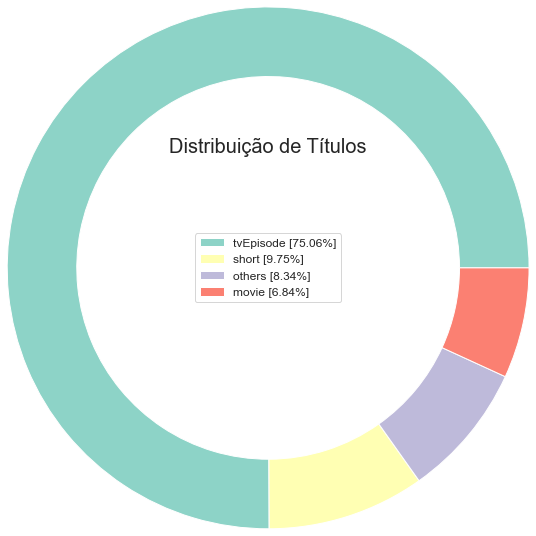

In [24]:
cs = cm.Set3(np.arange(100))


f = plt.figure()


plt.pie(resultado1['COUNT'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Distribuição de Títulos", loc = 'Center', fontdict = {'fontsize':20,'fontweight':20})
plt.show()